In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install seaborn

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/SPRING 25/Code Stacker/Competition_Dataset.csv"


'/content/drive/My Drive/SPRING 25/Code Stacker/Competition_Dataset.csv'


In [4]:
df = pd.read_csv("/content/drive/My Drive/SPRING 25/Code Stacker/Competition_Dataset.csv")
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


# exploring


In [5]:
#exploring
#date range of data: 2003 to 2015
print(df['Dates'][0])
print(df['Dates'][len(df['Dates'])-1])
#categories
print(df['Category'].unique())
# print(df['Descript'].unique())
df.info() #we dont have any null entries
df.describe() #-122 y latitude is very common and 37 x




2015-05-13 23:53:00
2003-01-06 00:01:00
['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'WEAPON LAWS' 'BURGLARY' 'SUSPICIOUS OCC'
 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC' 'TRESPASS' 'MISSING PERSON'
 'KIDNAPPING' 'RUNAWAY' 'FRAUD' 'DISORDERLY CONDUCT' 'ARSON' 'BRIBERY'
 'EMBEZZLEMENT' 'EXTORTION' 'BAD CHECKS' 'STOLEN PROPERTY'
 'RECOVERED VEHICLE']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680826 entries, 0 to 680825
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Dates          680826 non-null  object 
 1   Category       680826 non-null  object 
 2   Descript       680826 non-null  object 
 3   DayOfWeek      680826 non-null  object 
 4   PdDistrict     680826 non-null  object 
 5   Resolution     680826 non-null  object 
 6   Address        680826 non-null  object 
 7   Latitude (Y)   680826 non-null  float64
 8   Longitude (X)  680826 non-null  

,Latitude (Y),Longitude (X)
count,680826.000000,680826.000000
mean,-122.422852,37.771560
std,0.030744,0.470065
min,-122.513642,37.707879
25%,-122.433532,37.752837
50%,-122.416517,37.775421
75%,-122.406843,37.784464
max,-120.500000,90.000000


<Axes: xlabel='Longitude (X)', ylabel='Latitude (Y)'>

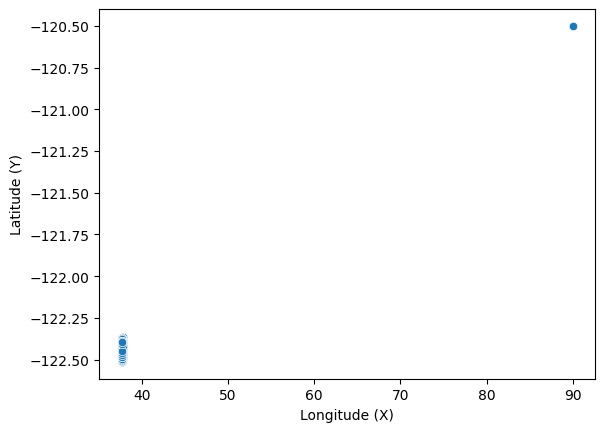

In [6]:
#scatter plot x with y to discover hot areas
import seaborn as sns
import matplotlib.pyplot as plt
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.scatterplot(x=df['Longitude (X)'], y=df['Latitude (Y)'])

In [7]:
#there are some outliers so clean the data
#https://www.w3resource.com/python-exercises/pandas/pandas-detect-and-remove-outliers-using-z-score.php#:~:text=Calculated%20Z%2Dscores%20to%20identify,returned%20the%20DataFrame%20without%20outliers.
zScores = pd.DataFrame()

meanx = df['Longitude (X)'].mean()
stdx = df['Longitude (X)'].std()
zScores['x'] = (df['Longitude (X)'] - meanx) / stdx

meany = df['Latitude (Y)'].mean()
stdy = df['Latitude (Y)'].std()
zScores['y'] = (df['Latitude (Y)'] - meany) / stdy

print(zScores)
print(zScores['x'].max())
print(zScores['x'].min())
print(zScores['y'].max())
print(zScores['y'].min())

df = df[zScores['x'].abs() <= 3]
df = df[zScores['y'].abs() <= 3]

               x         y
0       0.006465 -0.098865
1       0.006465 -0.098865
2       0.061384 -0.049144
3       0.062359 -0.134763
4      -0.000040 -0.516695
...          ...       ...
680821 -0.122331 -1.176829
680822 -0.084270 -0.797262
680823  0.018520  0.633016
680824  0.019247  1.051269
680825 -0.070944  0.908339

[680826 rows x 2 columns]
111.1089813421692
-0.13547222676019044
62.54303762678737
-2.9530505317366114


<ipython-input-7-c32d0d5bf9bd>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[zScores['y'].abs() <= 3]


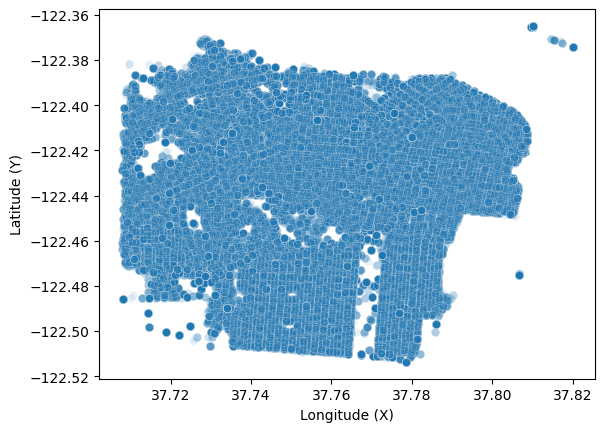

In [8]:
#scatter plot x with y to discover hot areas
# i think category and if many cases weren't resolved in the same area will affect the crime rate
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='Longitude (X)', y='Latitude (Y)',  alpha=0.1) #, hue='Resolution'
plt.show()

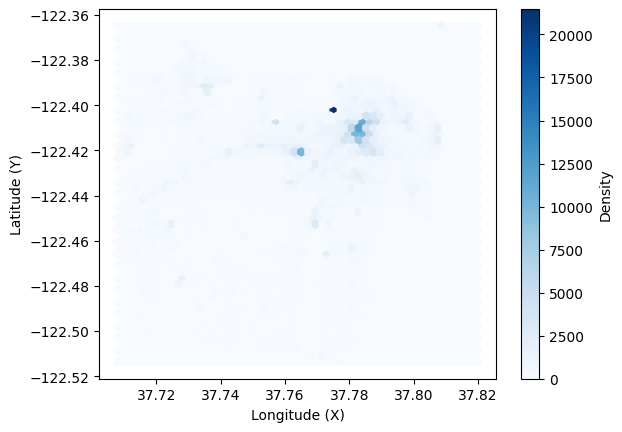

In [9]:
#apparently this is better for too many points?
plt.hexbin(df['Longitude (X)'], df['Latitude (Y)'], gridsize=50, cmap='Blues', alpha=0.99999)
plt.colorbar(label="Density")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.show()


In [10]:
#I also think I need a seperate date and time column rather than them merged:
#also additional columns are just for the ml model, seconds might be insignificant and minutes quite a bit
df['Dates'] = pd.to_datetime(df['Dates'])
df['Date'] = df['Dates'].dt.date
print(df['Date'])
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour
df['Minute'] = df['Dates'].dt.minute
df['Second'] = df['Dates'].dt.second
df

0         2015-05-13
1         2015-05-13
2         2015-05-13
3         2015-05-13
4         2015-05-13
             ...    
680821    2003-01-06
680822    2003-01-06
680823    2003-01-06
680824    2003-01-06
680825    2003-01-06
Name: Date, Length: 680771, dtype: object


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Date,Year,Month,Day,Hour,Minute,Second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,2015,5,13,23,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680821,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003-01-06,2003,1,6,0,15,0
680822,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003-01-06,2003,1,6,0,1,0
680823,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003-01-06,2003,1,6,0,1,0
680824,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003-01-06,2003,1,6,0,1,0


([<matplotlib.patches.Wedge at 0x7a3850189fd0>,
 [Text(0.8229476541518793, 0.7299021568168704, 'WARRANTS'),
  Text(-0.4200469575699643, 1.016641801932331, 'OTHER OFFENSES'),
  Text(-1.0560797225942995, 0.30772653367096475, 'LARCENY/THEFT'),
  Text(-1.0429579896811814, -0.34962641742321043, 'VEHICLE THEFT'),
  Text(-0.8024145199184237, -0.752416731754475, 'VANDALISM'),
  Text(-0.45491929307278256, -1.0015230585414197, 'NON-CRIMINAL'),
  Text(-0.07315804593427479, -1.0975645312759879, 'ROBBERY'),
  Text(0.28438474557785154, -1.062603085108744, 'WEAPON LAWS'),
  Text(0.5692746936052628, -0.9412365925847944, 'BURGLARY'),
  Text(0.774726898762038, -0.7808957883959645, 'SUSPICIOUS OCC'),
  Text(0.9163879311588083, -0.6084678788781536, 'FORGERY/COUNTERFEITING'),
  Text(1.0038532464075711, -0.44975399906724634, 'DRUG/NARCOTIC'),
  Text(1.0471710547731743, -0.33679783557089243, 'TRESPASS'),
  Text(1.0687943557680806, -0.26015115813367706, 'MISSING PERSON'),
  Text(1.0828962974597207, -0.1932242

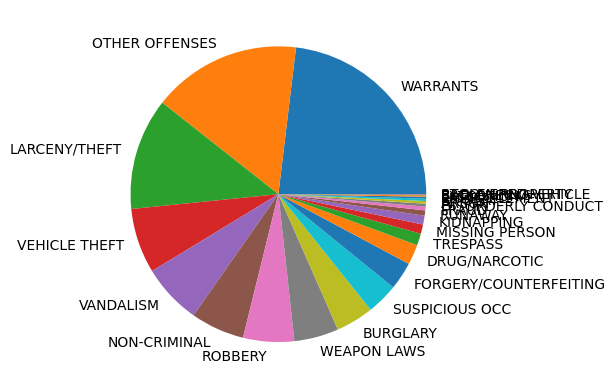

In [11]:
#categories visualization: part to whole
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
labels = df['Category'].unique()
sizes = df['Category'].value_counts()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
#most common are theft/robbery related, and warrants

([<matplotlib.patches.Wedge at 0x7a3855e11450>,
 [Text(0.923757739374786, 0.5972199251073137, 'NORTHERN'),
  Text(0.011174939169912523, 1.0999432352328682, 'PARK'),
  Text(-0.7749470507107656, 0.7806773140002764, 'INGLESIDE'),
  Text(-1.0949369906843074, 0.10541815038784047, 'RICHMOND'),
  Text(-0.9503605484728618, -0.5539086819200089, 'CENTRAL'),
  Text(-0.4753617140950967, -0.9919834881552071, 'TARAVAL'),
  Text(0.12938496149152393, -1.0923641937283723, 'TENDERLOIN'),
  Text(0.652133533325689, -0.8858452769598947, 'BAYVIEW'),
  Text(0.9570383679485167, -0.5422891869422067, 'MISSION'),
  Text(1.0847584857770942, -0.182480211350672, 'SOUTHERN')])

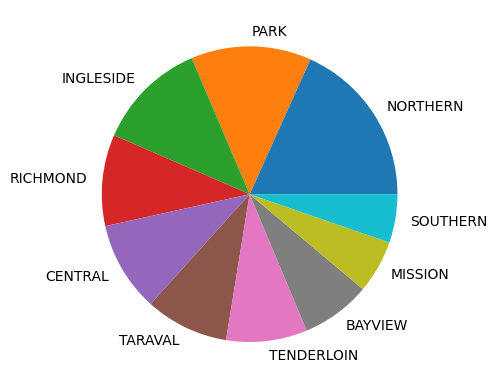

In [12]:
#most common districts?
labels = df['PdDistrict'].unique()
sizes = df['PdDistrict'].value_counts()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
#almost can be categorized into 3-4 categories based on size to whole

<BarContainer object of 7 artists>

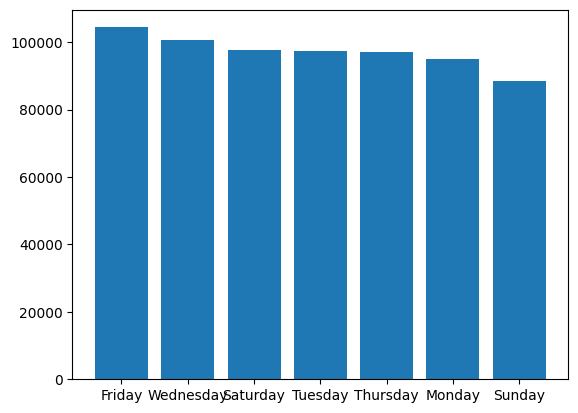

In [13]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
counts = df['DayOfWeek'].value_counts()
plt.bar(counts.index, counts.values)
#almost all are equal so day of the week is not really significant input
#friday and wednesday are the highest, sat tue thu are almost exact same followed by monday then sunday is the lowest

In [14]:
counts = df['Resolution'].value_counts()
print(counts)
#most of the crimes arent resolved, and when resolved its quite often with an arrest
#maybe not resolving crimes causes them to increase

Resolution
NONE                                      423144
ARREST, BOOKED                            144995
ARREST, CITED                              59310
LOCATED                                    15238
PSYCHOPATHIC CASE                          12802
UNFOUNDED                                   7772
JUVENILE BOOKED                             3732
NOT PROSECUTED                              3142
JUVENILE CITED                              2406
COMPLAINANT REFUSES TO PROSECUTE            2157
PROSECUTED BY OUTSIDE AGENCY                2015
DISTRICT ATTORNEY REFUSES TO PROSECUTE      1753
EXCEPTIONAL CLEARANCE                        965
JUVENILE ADMONISHED                          913
JUVENILE DIVERTED                            285
CLEARED-CONTACT JUVENILE FOR MORE INFO       111
PROSECUTED FOR LESSER OFFENSE                 31
Name: count, dtype: int64


In [15]:
#whats the most common categories? how were they mostly resolved?

#can we link categories to districts?
#heatmap?

from matplotlib.colors import LinearSegmentedColormap


heatmap_counts =[]
# reorganize data
for index, row in df.iterrows():
    category = row['Category']
    resol = row['Resolution']
    heatmap_counts.append((category, resol))

hmdf = pd.DataFrame(heatmap_counts, columns=['Category', 'Resolution'])
# print(hmdf)
# hmdf
smth = hmdf.groupby(['Category', 'Resolution']).size().reset_index(name='count')
print(smth)
# smth


        Category                              Resolution  count
0          ARSON                          ARREST, BOOKED    191
1          ARSON                           ARREST, CITED      6
2          ARSON  CLEARED-CONTACT JUVENILE FOR MORE INFO      1
3          ARSON        COMPLAINANT REFUSES TO PROSECUTE      2
4          ARSON                     JUVENILE ADMONISHED      3
..           ...                                     ...    ...
354  WEAPON LAWS                          NOT PROSECUTED     25
355  WEAPON LAWS            PROSECUTED BY OUTSIDE AGENCY      2
356  WEAPON LAWS           PROSECUTED FOR LESSER OFFENSE      1
357  WEAPON LAWS                       PSYCHOPATHIC CASE      9
358  WEAPON LAWS                               UNFOUNDED     67

[359 rows x 3 columns]


<Axes: xlabel='Resolution', ylabel='Category'>

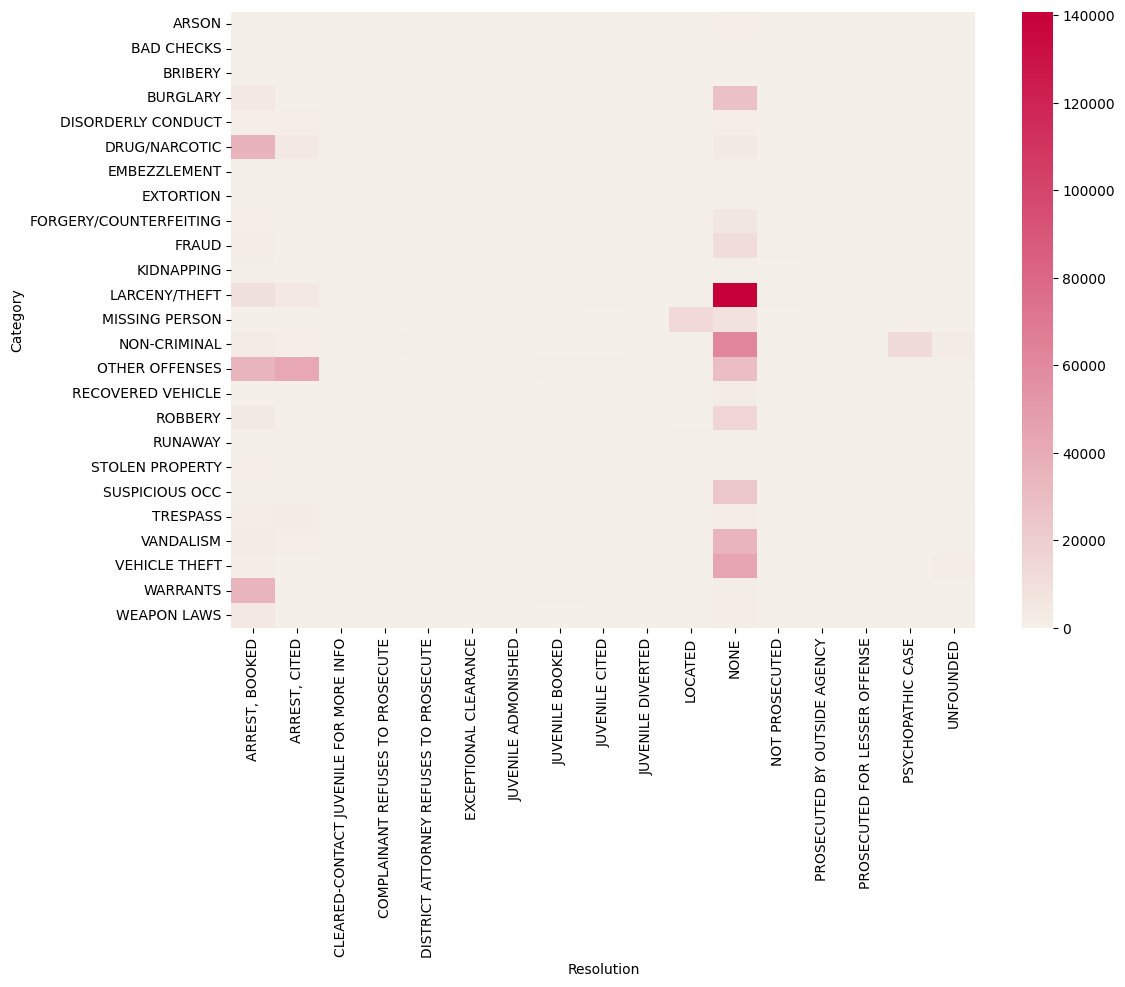

In [16]:
hmpv = smth.pivot(index='Category', columns='Resolution', values='count')
hmpv = hmpv.fillna(0)
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f4f0e7", "#C70039"])
hmpv
plt.figure(figsize=(12, 8))
sns.heatmap(hmpv, cmap = cmap)

##most crimes aren't resolved, this might've caused an increase

        Category  PdDistrict  count
0          ARSON     BAYVIEW    357
1          ARSON     CENTRAL    103
2          ARSON   INGLESIDE    169
3          ARSON     MISSION    131
4          ARSON    NORTHERN    141
..           ...         ...    ...
245  WEAPON LAWS        PARK    287
246  WEAPON LAWS    RICHMOND    249
247  WEAPON LAWS    SOUTHERN    902
248  WEAPON LAWS     TARAVAL    436
249  WEAPON LAWS  TENDERLOIN    653

[250 rows x 3 columns]


<Axes: xlabel='PdDistrict', ylabel='Category'>

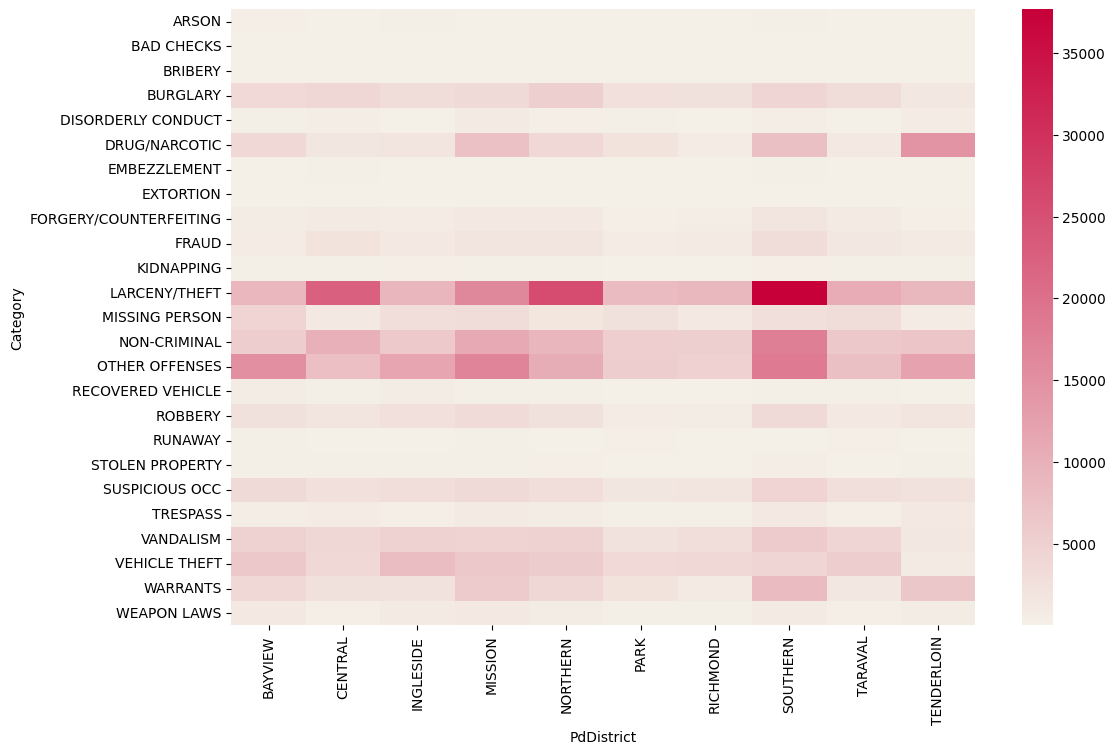

In [17]:
####categories to districts?
heatmap_counts =[]
# reorganize data
for index, row in df.iterrows():
    category = row['Category']
    resol = row['PdDistrict']
    heatmap_counts.append((category, resol))

hmdf = pd.DataFrame(heatmap_counts, columns=['Category', 'PdDistrict'])
# print(hmdf)
# hmdf
smth = hmdf.groupby(['Category', 'PdDistrict']).size().reset_index(name='count')
print(smth)
# smth

hmpv = smth.pivot(index='Category', columns='PdDistrict', values='count')
hmpv = hmpv.fillna(0)
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f4f0e7", "#C70039"])
hmpv
plt.figure(figsize=(12, 8))
sns.heatmap(hmpv, cmap = cmap)


#southern district almost has the most crimes in every category, however crimes categories seems common
#richmond and park seem to have the least overall

In [18]:
# I want to see if crimes increased with dates
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

y = df.groupby('Date').size()
print(y)


Date
2003-01-06    312
2003-01-07    324
2003-01-08    424
2003-01-09    330
2003-01-10    308
             ... 
2015-05-02    293
2015-05-03    297
2015-05-11    346
2015-05-12    256
2015-05-13    290
Length: 2249, dtype: int64


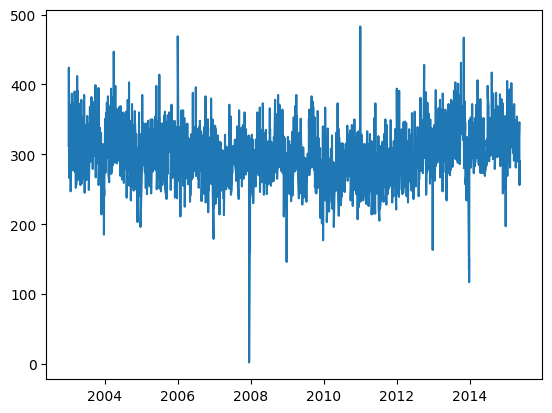

In [19]:
plt.plot(y.index, y.values)
#no obvious trends

In [20]:
#heat map month with day? maybe the end of month is hittin hard
####categories to districts?
heatmap_counts =[]
# reorganize data
for index, row in df.iterrows():
    category = row['Day']
    resol = row['Month']
    heatmap_counts.append((category, resol))

hmdf = pd.DataFrame(heatmap_counts, columns=['Day', 'Month'])
# print(hmdf)
# hmdf
smth = hmdf.groupby(['Day', 'Month']).size().reset_index(name='count')
print(smth)
# smth



     Day  Month  count
0      1      1   1346
1      1      3    368
2      1      4   2621
3      1      5   3372
4      1      6   3548
..   ...    ...    ...
355   31      5   3004
356   31      7    771
357   31      8    655
358   31     10   3759
359   31     12   1203

[360 rows x 3 columns]


<Axes: xlabel='Month', ylabel='Day'>

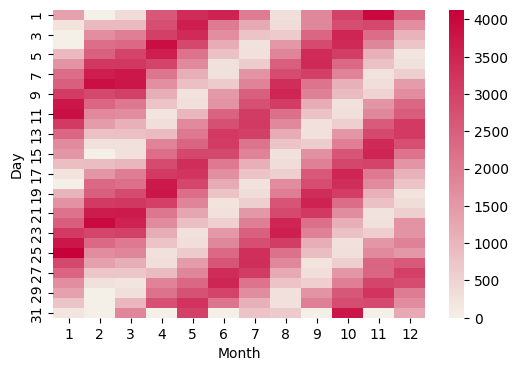

In [21]:
hmpv = smth.pivot(index='Day', columns='Month', values='count')
hmpv = hmpv.fillna(0)
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f4f0e7", "#C70039"])
hmpv
plt.figure(figsize=(6, 4))
sns.heatmap(hmpv, cmap = cmap)
#there is clearly a trend days but it gets a day or a couple earlier each month
#quite unsure what these days represent but i believe this is american data and many lower wage jobs get paid weekly thet might be it?

In [22]:
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
#enough exploring and preprocessing
#first pass done by: 18th Mar, to do: clean and organize, see if there is variables that might be linked?
#                                     learn about DBSCAN to scatter plot areas more accurately
#                                     Extracting features from Dates like day/night classification. and visualise things like peak hours
#                                       Crime frequency by category: Some crimes are significantly more common than others.
#                                       Temporal patterns: Some crimes may peak at night or on weekends.

#


##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################
##############################################################################################################################################################################################################################

'''


for the next level, i might need to handle data imbalance esp in the resolution class to accurately build my model
as a base model, consider TF-IDF + SVM
if we are allowed to use pre-trained models maybe bert? bu i will first have to clean my text to fine tune it
or combine svm and logistic and maybe naive bayes



this part is easy start with it: * Classify each crime into the following severity levels based on its category:
    * **Severity 1**: NON-CRIMINAL, SUSPICIOUS OCCURRENCE, MISSING PERSON, RUNAWAY, RECOVERED VEHICLE
    * **Severity 2**: WARRANTS, OTHER OFFENSES, VANDALISM, TRESPASS, DISORDERLY CONDUCT, BAD CHECKS
    * **Severity 3**: LARCENY/THEFT, VEHICLE THEFT, FORGERY/COUNTERFEITING, DRUG/NARCOTIC, STOLEN PROPERTY, FRAUD, BRIBERY, EMBEZZLEMENT
    * **Severity 4**: ROBBERY, WEAPON LAWS, BURGLARY, EXTORTION
    * **Severity 5**: KIDNAPPING, ARSON
* This part can be implemented using simple conditional logic.
* Output both **predicted crime type** and **assigned severity**.






'''

'\n\n\nfor the next level, i might need to handle data imbalance esp in the resolution class to accurately build my model\nas a base model, consider TF-IDF + SVM\nif we are allowed to use pre-trained models maybe bert? bu i will first have to clean my text to fine tune it\nor combine svm and logistic and maybe naive bayes\n\n\n\nthis part is easy start with it: * Classify each crime into the following severity levels based on its category:\n    * **Severity 1**: NON-CRIMINAL, SUSPICIOUS OCCURRENCE, MISSING PERSON, RUNAWAY, RECOVERED VEHICLE\n    * **Severity 2**: WARRANTS, OTHER OFFENSES, VANDALISM, TRESPASS, DISORDERLY CONDUCT, BAD CHECKS\n    * **Severity 3**: LARCENY/THEFT, VEHICLE THEFT, FORGERY/COUNTERFEITING, DRUG/NARCOTIC, STOLEN PROPERTY, FRAUD, BRIBERY, EMBEZZLEMENT\n    * **Severity 4**: ROBBERY, WEAPON LAWS, BURGLARY, EXTORTION\n    * **Severity 5**: KIDNAPPING, ARSON\n* This part can be implemented using simple conditional logic.\n* Output both **predicted crime type** and 

In [23]:

import string
import spacy

# Load spaCy model with only the tokenizer and lemmatizer
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Define punctuation removal table
punct_translator = str.maketrans('', '', string.punctuation)

def preprocess_texts(texts):
    """Efficiently preprocess a list of texts using spaCy's nlp.pipe()"""
    texts = [text.lower().translate(punct_translator) for text in texts]  # Lowercase & remove punctuation
    docs = nlp.pipe(texts)  # Batch process texts efficiently
    return [" ".join(token.lemma_ for token in doc if not token.is_stop) for doc in docs]  # Lemmatize & remove stopwords

# Apply preprocessing in batches
df['Descript_cleaned'] = preprocess_texts(df['Descript'].astype(str).tolist())



####note that since this is stemmed it wont work with models like BERT or any transformer models (cnn, lstms, ...)
### use spacy lemmatizer rather than nltk, it should be better?   i removed stemming and applied lemmas instead

In [24]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Date,Year,Month,Day,Hour,Minute,Second,Descript_cleaned
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,53,0,warrant arrest
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,53,0,traffic violation arrest
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,2015,5,13,23,33,0,traffic violation arrest
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,2015,5,13,23,30,0,grand theft locked auto
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,2015,5,13,23,30,0,grand theft locked auto


In [25]:
print(df.groupby('Category')['Descript'].unique().reset_index())


                  Category                                           Descript
0                    ARSON  [ARSON OF A VEHICLE, ARSON, ATTEMPTED ARSON, F...
1               BAD CHECKS  [CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR), C...
2                  BRIBERY  [DISSUADING WITNESS, VICTIM, BRIBERY OF EXECUT...
3                 BURGLARY  [BURGLARY, VEHICLE (ARREST MADE), BURGLARY OF ...
4       DISORDERLY CONDUCT  [DISTURBING THE PEACE, DISTURBING THE PEACE, C...
5            DRUG/NARCOTIC  [ILLEGAL SUBSTANCES, SALE OF CONTROLLED SUBSTA...
6             EMBEZZLEMENT  [EMBEZZLED VEHICLE, EMBEZZLEMENT, GRAND THEFT ...
7                EXTORTION                   [EXTORTION, ATTEMPTED EXTORTION]
8   FORGERY/COUNTERFEITING  [FORGERY, NOTES, FORGERY & COUNTERFEITING (GEN...
9                    FRAUD  [FRAUDULENT USE OF AUTOMATED TELLER CARD, CRED...
10              KIDNAPPING  [FALSE IMPRISONMENT, KIDNAPPING DURING ROBBERY...
11           LARCENY/THEFT  [GRAND THEFT FROM LOCKED AUTO, GRAND

In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define your X and y
X = df['Descript_cleaned']
y = df['Category']

# Encode the target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y) ####encode before splitting

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded,
                                                    test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                test_size=0.5, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()

# Apply vectorizer only on the training data first
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Define Logistic Regression model
model = LogisticRegression(max_iter=100)


# Fit GridSearchCV and show results for each fold and hyperparameter combination
model.fit(X_train_tfidf, y_train)


y_test_pred = model.predict(X_test_tfidf)
valAcc = accuracy_score(y_test, y_test_pred)
print('Accuracy: ', valAcc)


#i chose accuracy because i am interested in correct output

'''
# Use cross-validation for fine-tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning (you can modify hyperparameters)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Solvers to try
}

# GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)


'''

Accuracy:  0.9965215960703436


"\n# Use cross-validation for fine-tuning\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# Perform GridSearchCV for hyperparameter tuning (you can modify hyperparameters)\nparam_grid = {\n    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter\n    'solver': ['liblinear', 'saga'],  # Solvers to try\n}\n\n# GridSearchCV to find the best hyperparameters using cross-validation\ngrid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)\n\n\n"

In [27]:
#this is not working currently but if I had time I'll debug it
'''
#handle class imbalance
# try it with and without if there is a time
# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
X = df['Descript_cleaned']
y = df['Category']

X, y
from imblearn.over_sampling import SMOTE
from collections import Counter


# Check original class distribution
print("Original class distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("Resampled class distribution:", Counter(y_resampled))


'''

'\n#handle class imbalance\n# try it with and without if there is a time\n# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/\nX = df[\'Descript_cleaned\']\ny = df[\'Category\']\n\nX, y\nfrom imblearn.over_sampling import SMOTE\nfrom collections import Counter\n\n\n# Check original class distribution\nprint("Original class distribution:", Counter(y))\n\n# Apply SMOTE\nsmote = SMOTE(random_state=42)\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\n# Check new class distribution\nprint("Resampled class distribution:", Counter(y_resampled))\n\n\n'

In [28]:
#only run this after fine tuning

y_test_pred = model.predict(X_test_tfidf)
test_acc = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_acc)


###probably its overfitting, model is too simple for the data?


Test Accuracy: 0.9965215960703436


In [30]:
from sklearn.neural_network import MLPClassifier

# Define your X and y
X = df['Descript_cleaned']
y = df['Category']

# Encode the target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded,
                                                    test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                test_size=0.5, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()

# Apply vectorizer only on the training data first
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Define the neural network model with fewer layers and perceptrons as the data seems simple
parameters = {
    'solver': ['adam'],  # Only trying 'adam' solver for simplicity
    'max_iter': [100],  # Limited iterations
    'alpha': 10.0 ** -np.arange(1, 2),  # Limited regularization values
    'hidden_layer_sizes': [(10,), (20, 60)],  # Two options for layer sizes
}

# Initialize GridSearchCV
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Fit the grid search model on the training data
clf.fit(X_train_tfidf, y_train)

# Print results for all the models tested during grid search
print("GridSearchCV Results:")
for mean_score, params in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['params']):
    print(f"Parameters: {params}, Cross-Validation Accuracy: {mean_score:.4f}")

# Print the best parameters and the best model found by GridSearchCV
print("\nBest Parameters from GridSearchCV:", clf.best_params_)
print("Best Model Accuracy on Training Data:", clf.score(X_train_tfidf, y_train))

# Use the best model to predict on the validation set
y_val_pred = clf.best_estimator_.predict(X_val_tfidf)
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report for Validation Set:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix for Validation Set:\n", confusion_matrix(y_val, y_val_pred))

# Now, evaluate the best model on the test set
y_test_pred = clf.best_estimator_.predict(X_test_tfidf)
test_acc = accuracy_score(y_test, y_test_pred)

print("\nTest Accuracy:", test_acc)
print("Classification Report for Test Set:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_test_pred))


GridSearchCV Results:
Parameters: {'alpha': np.float64(0.1), 'hidden_layer_sizes': (10,), 'max_iter': 100, 'solver': 'adam'}, Cross-Validation Accuracy: 0.9945
Parameters: {'alpha': np.float64(0.1), 'hidden_layer_sizes': (20, 60), 'max_iter': 100, 'solver': 'adam'}, Cross-Validation Accuracy: 0.9960

Best Parameters from GridSearchCV: {'alpha': np.float64(0.1), 'hidden_layer_sizes': (20, 60), 'max_iter': 100, 'solver': 'adam'}
Best Model Accuracy on Training Data: 0.9948000058756996

Validation Accuracy: 0.994488609989835
Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       342
           1       1.00      1.00      1.00        90
           2       0.00      0.00      0.00        59
           3       1.00      1.00      1.00      8302
           4       1.00      1.00      1.00       966
           5       1.00      1.00      1.00     11102
           6       1.00      1.00      1.00       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Test Accuracy: 0.9944533558959534
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       341
           1       1.00      1.00      1.00        94
           2       0.00      0.00      0.00        64
           3       1.00      1.00      1.00      8258
           4       1.00      1.00      1.00      1011
           5       1.00      1.00      1.00     11356
           6       1.00      1.00      1.00       278
           7       1.00      1.00      1.00        51
           8       1.00      1.00      1.00      2196
           9       1.00      0.99      1.00      3727
          10       0.95      1.00      0.97       530
          11       1.00      1.00      1.00     39142
          12       1.00      1.00      1.00      5758
          13       1.00      1.00      1.00     20837
          14       1.00      1.00      1.00     27526
          15       0.00      0.00      0.00       729
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
#IF I HAD TIME I ALSO WANT TO BUILD A MODEL OF WORD EMBEDDINGS, A PRETRAINED ONE + CNN, a word embedding will be better than tf-idf in this case
# or i might also improve the effeciency of a tf-idf by reducing the idf penality for same-category text


#if we want to consider other factors like the time and the date then maybe use more complex model, but since we are just relying on decription now this must be enough

In [32]:
'''
#### **Part B: Assigning Crime Severity**

* Classify each crime into the following severity levels based on its category:
    * **Severity 1**: NON-CRIMINAL, SUSPICIOUS OCCURRENCE, MISSING PERSON, RUNAWAY, RECOVERED VEHICLE
    * **Severity 2**: WARRANTS, OTHER OFFENSES, VANDALISM, TRESPASS, DISORDERLY CONDUCT, BAD CHECKS
    * **Severity 3**: LARCENY/THEFT, VEHICLE THEFT, FORGERY/COUNTERFEITING, DRUG/NARCOTIC, STOLEN PROPERTY, FRAUD, BRIBERY, EMBEZZLEMENT
    * **Severity 4**: ROBBERY, WEAPON LAWS, BURGLARY, EXTORTION
    * **Severity 5**: KIDNAPPING, ARSON
* This part can be implemented using simple conditional logic.
* Output both **predicted crime type** and **assigned severity**.

'''
map = {'Severity 1': ['NON-CRIMINAL', 'SUSPICIOUS OCCURRENCE', 'MISSING PERSON', 'RUNAWAY', 'RECOVERED VEHICLE'],
       'Severity 2': ['WARRANTS', 'OTHER OFFENSES', 'VANDALISM', 'TRESPASS', 'DISORDERLY CONDUCT', 'BAD CHECKS'],
       'Severity 3': ['LARCENY/THEFT', 'VEHICLE THEFT', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY', 'FRAUD', 'BRIBERY', 'EMBEZZLEMENT'],
       'Severity 4': ['ROBBERY', 'WEAPON LAWS', 'BURGLARY', 'EXTORTION'],
       'Severity 5': ['KIDNAPPING', 'ARSON']}

df['Severity'] = df['Category'].map(lambda x: next((key for key, val in map.items() if x in val), None))

df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Date,Year,Month,Day,Hour,Minute,Second,Descript_cleaned,Severity
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,53,0,warrant arrest,Severity 2
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,53,0,traffic violation arrest,Severity 2
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,2015,5,13,23,33,0,traffic violation arrest,Severity 2
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,2015,5,13,23,30,0,grand theft locked auto,Severity 3
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,2015,5,13,23,30,0,grand theft locked auto,Severity 3


In [33]:
#skipped part 3 here

In [34]:
'''
### **Level 4: Advanced Web UI & Report Extraction**

**Officers receive reports in PDF format. Can you extract and process them automatically?**

#### **Part A: Police Report Extraction**

* You’ll be provided with sample police reports in PDF format.
* Your task is to automatically extract key fields aligned with the task at hand.

#### **Part B: Integration with Classifier**

* Convert this data into a structured format and feed it into your model from Level 2.
* Predict the crime category and severity.





'''

#https://www.geeksforgeeks.org/working-with-pdf-files-in-python/
#!pip install pypdf

'\n### **Level 4: Advanced Web UI & Report Extraction**\n\n**Officers receive reports in PDF format. Can you extract and process them automatically?**\n\n#### **Part A: Police Report Extraction**\n\n* You’ll be provided with sample police reports in PDF format.\n* Your task is to automatically extract key fields aligned with the task at hand.\n\n#### **Part B: Integration with Classifier**\n\n* Convert this data into a structured format and feed it into your model from Level 2.\n* Predict the crime category and severity.\n\n\n\n\n\n'

In [35]:
import os
reports = os.listdir('/content/drive/My Drive/SPRING 25/Code Stacker/Police Reports')
print(reports)

['police_crime_report_6.pdf', 'police_crime_report_4.pdf', 'police_crime_report_2.pdf', 'police_crime_report_7.pdf', 'police_crime_report_10.pdf', 'police_crime_report_3.pdf', 'police_crime_report_5.pdf', 'police_crime_report_9.pdf', 'police_crime_report_1.pdf']


In [37]:
!pip install pypdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 4.9 MB/s eta 0:00:00


In [38]:
# importing required classes
from pypdf import PdfReader

reports_text =[]
for i in reports:
  nPath = os.path.join('/content/drive/My Drive/SPRING 25/Code Stacker/Police Reports', i)
  # creating a pdf reader object
  reader = PdfReader(nPath)

  # printing number of pages in pdf file
  print(len(reader.pages))

  # creating a page object
  page = reader.pages[0]

  # extracting text from page
  page_text = page.extract_text()
  reports_text.append(page_text)
  print(page_text)

1
City Police Department 
Official Police Crime Report 
 
Report Number: 2024-001245 
Date & Time: 2014-09-06 19:00:00 
Reporting Officer: Officer G. Rogers #3321 
Incident Location: 100 Block of HAHN ST 
Coordinates: (37.7126758141231, -122.415587200313) 
Detailed Description: 
Aided case, mentally disturbed individual. Subject taken to 
psychiatric care. 
Police District: Ingleside 
Resolution: Psychopathic Case 
Suspect Description: N/A 
Victim Information: Subject referred to medical care. 
 
1
City Police Department 
Official Police Crime Report 
 
Report Number: 2024-001243 
Date & Time: 2008-09-20 09:00:00 
Reporting Officer: Officer J. Anderson #9567 
Incident Location: 200 Block of JONES ST 
Coordinates: (37.7834687204586, -122.412573643201) 
Detailed Description: 
Burglary of apartment house, unlawful entry. Suspect forced entry 
and stole electronics. 
Police District: Tenderloin 
Resolution: None 
Suspect Description: Unknown suspect, possible forced entry. 
Victim Informat

In [41]:
#https://www.geeksforgeeks.org/python-extract-substring-using-regex/
#https://medium.com/@monicanogueras/15-examples-for-advanced-text-processing-using-regex-48223adc720d
import re
patterns = {
    "rnum": r"Report Number:\s*([0-9]{4}-[0-9]{6})",
    "datentime": r"Date & Time:\s*([0-9]{4}-[0-9]{2}-[0-9]{2} [0-9]{2}:[0-9]{2}:[0-9]{2})",
    "officer": r"Reporting Officer:\s*([^\n]+)",  # Stops at newline
    "loc": r"Incident Location:\s*([^\n]+)",  # Stops at newline
    "coords": r"Coordinates:\s*\(([^)]+)\)",  # Captures only inside parentheses
    "descript": r"Detailed Description:\s*([^\n]+)",  # Stops at newline
    "district": r"Police District:\s*([^\n]+)",  # Stops at newline
    "res": r"Resolution:\s*([^\n]+)",  # Stops at newline
    "sus descript": r"Suspect Description:\s*([^\n]+)",  # Stops at newline
    "vinfo": r"Victim Information:\s*([^\n]+)"  # Stops at newline
}


#skip first 3 lines
'''
Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'Latitude (Y)', 'Longitude (X)', 'Date',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Descript_cleaned'],
      dtype='object')
'''

newData = []
for i in reports_text:
  extracted_data = {}

  for key, pattern in patterns.items():
      match = re.search(pattern, reports_text[0], re.DOTALL)
      extracted_data[key] = match.group(1).strip()


  #print(extracted_data.items())

import re
import pandas as pd

# Define regex patterns
patterns = {
    "rnum": r"Report Number:\s*([0-9]{4}-[0-9]{6})",
    "datentime": r"Date & Time:\s*([0-9]{4}-[0-9]{2}-[0-9]{2} [0-9]{2}:[0-9]{2}:[0-9]{2})",
    "officer": r"Reporting Officer:\s*([^\n]+)",
    "loc": r"Incident Location:\s*([^\n]+)",
    "coords": r"Coordinates:\s*\(([^)]+)\)",
    "descript": r"Detailed Description:\s*([^\n]+)",
    "district": r"Police District:\s*([^\n]+)",
    "res": r"Resolution:\s*([^\n]+)",
    "sus descript": r"Suspect Description:\s*([^\n]+)",
    "vinfo": r"Victim Information:\s*([^\n]+)"
}

# Example new report texts (assuming reports_text is a list of strings)
extracted_data_list = []

for report in reports_text:
    extracted_data = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, report, re.DOTALL)
        extracted_data[key] = match.group(1).strip() if match else None
    extracted_data_list.append(extracted_data)

# Convert to DataFrame
new_data_df = pd.DataFrame(extracted_data_list)

# Split coordinates into Latitude and Longitude
new_data_df[['Latitude (Y)', 'Longitude (X)']] = new_data_df['coords'].str.split(', ', expand=True)

# Convert datentime to structured date components
new_data_df['Dates'] = pd.to_datetime(new_data_df['datentime'])
new_data_df['Year'] = new_data_df['Dates'].dt.year
new_data_df['Month'] = new_data_df['Dates'].dt.month
new_data_df['Day'] = new_data_df['Dates'].dt.day
new_data_df['Hour'] = new_data_df['Dates'].dt.hour
new_data_df['Minute'] = new_data_df['Dates'].dt.minute
new_data_df['Second'] = new_data_df['Dates'].dt.second

# Rename columns to match the required format
new_data_df.rename(columns={
    'descript': 'Descript',
    'district': 'PdDistrict',
    'res': 'Resolution',
    'loc': 'Address'
}, inplace=True)

# Drop unnecessary columns
new_data_df.drop(columns=['rnum', 'datentime', 'coords', 'sus descript', 'vinfo', 'officer'], inplace=True)

# Preprocess 'Descript' to create 'Descript_cleaned'
new_data_df['Descript_cleaned'] = preprocess_texts(new_data_df['Descript'].astype(str).tolist())

# Vectorize the new data
tfidf_new_data = vectorizer.transform(new_data_df['Descript_cleaned'])

# Make predictions using the best trained model
new_predictions = clf.best_estimator_.predict(tfidf_new_data)

# Decode predicted labels back to original categories
new_data_df['predictedCate'] = encoder.inverse_transform(new_predictions)

# Display the final DataFrame with predictions
print(new_data_df[['Dates', 'Descript', 'PdDistrict','Descript_cleaned', 'Resolution', 'Address', 'Latitude (Y)', 'Longitude (X)', 'predictedCate']])


                Dates                                           Descript  \
0 2014-09-06 19:00:00  Aided case, mentally disturbed individual. Sub...   
1 2008-09-20 09:00:00  Burglary of apartment house, unlawful entry. S...   
2 2010-10-04 12:15:00  Petty theft of property. Wallet and phone repo...   
3 2010-12-29 08:39:00  Evading a police officer recklessly. High -spe...   
4 2004-03-06 17:45:00  Grand theft from locked auto. Expensive belong...   
5 2010-09-10 17:17:00  Investigative detention. Officers detained a p...   
6 2012-08-07 18:00:00  Missing juvenile reported. Individual was late...   
7 2015-04-28 14:35:00  Petty theft of property. Personal items taken ...   
8 2013-08-11 18:00:00  Petty theft from locked auto. Personal belongi...   

   PdDistrict                                   Descript_cleaned  \
0   Ingleside  aid case mentally disturb individual subject take   
1  Tenderloin  burglary apartment house unlawful entry suspec...   
2     Central  petty theft property